In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# gas = ct.Solution("seiser.cti")  # Change .cti file to standard simple reaction
gas = ct.Solution("2S_methane.cti")
# gas.Y = np.array([0.5, 0, 0.5, 0, 0])
gas.TP = 1200, 101325
gas.TD = 1200, 10
reactor = ct.IdealGasReactor(gas)
exhaust_gas = ct.Solution("2S_methane.cti")
exhaust = ct.Reservoir(exhaust_gas)
mfc = ct.MassFlowController(upstream = reactor, downstream = exhaust, mdot = 1e7)  # mdot = nozzle_nasa_mdot
# sim.advance(5.93e-6)
#gas.Y = np.array([0.25, 0.25, 0.25, 0.25, 0, 0])
gas.Y = np.ones(gas.n_species) / gas.n_species
# gas.set_equivalence_ratio(phi=1.0, fuel='nc7h16', oxidizer={'o2':1.0, 'n2':3.76})
np.save(".npy files/ini_mass_fraction.npy", gas.Y)
sim = ct.ReactorNet([reactor])
gas()


  CH4_CM2:

       temperature            1200  K
          pressure     4.04438e+06  Pa
           density              10  kg/m^3
  mean mol. weight         24.6697  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -3.6287e+06       -8.952e+07     J
   internal energy     -4.0331e+06        -9.95e+07     J
           entropy          9466.5        2.335e+05     J/K
    Gibbs function     -1.4988e+07       -3.698e+08     J
 heat capacity c_p          2021.5        4.987e+04     J/K
 heat capacity c_v          1684.4        4.155e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.128493         0.166667         -25.4521
               H2O       0.228229         0.166667         -47.4928
               CH4       0.256291         0.166667         -31.2398
                CO      

In [83]:
gas.density


  CH4_CM2:

       temperature          7.5018  K
          pressure          252834  Pa
           density             100  kg/m^3
  mean mol. weight         24.6697  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -5.5356e+06       -1.366e+08     J
   internal energy     -5.5382e+06       -1.366e+08     J
           entropy          3327.8         8.21e+04     J/K
    Gibbs function     -5.5606e+06       -1.372e+08     J
 heat capacity c_p          1348.5        3.327e+04     J/K
 heat capacity c_v          1011.5        2.495e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.128493         0.166667         -150.449
               H2O       0.228229         0.166667         -4042.16
               CH4       0.256291         0.166667          -1366.7
                CO      

In [102]:
#gas.TP = 1200, 101325
#gas.set_equivalence_ratio(phi=1.0, fuel='nc7h16', oxidizer={'o2':1.0, 'n2':3.76})
reactor = ct.IdealGasReactor(gas)
sim = ct.ReactorNet([reactor])
n_t = 200
Pt = np.zeros(n_t)
Tt = np.zeros(n_t)
Yt = np.zeros((gas.n_species,n_t))
Rhot = np.zeros(n_t)  # New array for changing density of gases, representing incoming mass flux
for i in range(n_t):
    sim.advance((i+1)*1e-7)
    Pt[i] = gas.P
    Tt[i] = gas.T
    Yt[:,i] = gas.Y
    Rhot[i] = gas.density
    # gas.DP = 1, 1
    # gas.TP = 1200, 101325
    # print(nozzle_nasa_mdot((i+1)*1e-14))
gas()
# gas.DP


  CH4_CM2:

       temperature         2039.74  K
          pressure     7.55568e+06  Pa
           density              10  kg/m^3
  mean mol. weight         22.4458  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -3.2775e+06       -7.357e+07     J
   internal energy     -4.0331e+06       -9.053e+07     J
           entropy           10820        2.429e+05     J/K
    Gibbs function     -2.5347e+07       -5.689e+08     J
 heat capacity c_p          2254.7        5.061e+04     J/K
 heat capacity c_v          1884.3        4.229e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2     3.0956e-11      4.41311e-11         -48.7209
               H2O       0.414713         0.332854         -38.3852
               CH4       0.129658        0.0926711         -31.6223
                CO      

In [22]:
Pt

array([207514.98338178, 252854.52481331, 252834.11315809, 252814.27035138,
       252794.96795079, 252776.17922432, 252757.87908203, 252740.0439944 ,
       252722.65190331, 252705.68213107, 252689.11529089, 252672.93319871,
       252657.11879053, 252641.65604354, 252626.52990146, 252611.72620579,
       252597.23163754, 252583.03364626, 252569.12040426, 252555.48075294,
       252542.10415563, 252528.98065749, 252516.10084119, 252503.45579327,
       252491.0370697 , 252478.83666443, 252466.84698101, 252455.06080539,
       252443.47128324, 252432.07189367, 252420.85642973, 252409.81898099,
       252398.9539162 , 252388.2558624 , 252377.71969142, 252367.34050611,
       252357.11362635, 252347.03457673, 252337.09907496, 252327.3030211 ,
       252317.64248789, 252308.11371095, 252298.71307838, 252289.43712566,
       252280.28252709, 252271.24608558, 252262.32473061, 252253.51550966,
       252244.81558232, 252236.22221234, 252227.73276661, 252219.34470828,
       252211.05559221, 2

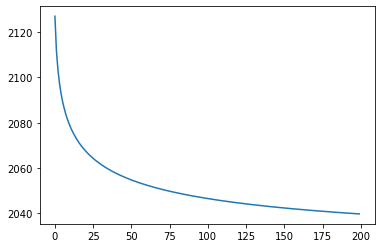

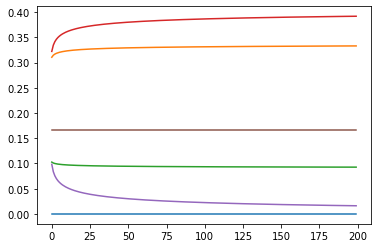

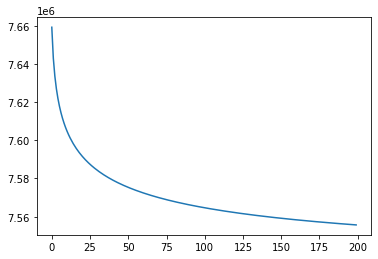

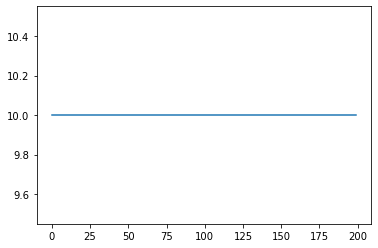

In [103]:
plt.plot(Tt)
plt.figure()
# plt.plot(Tt)
for i in range(gas.n_species):
    plt.plot(Yt[i,:])

plt.figure()
plt.plot(Pt)
plt.figure()
plt.plot(Rhot)
####

In [11]:
np.save('.npy files/pressure.npy', Pt)
np.save('.npy files/temperature.npy', Tt)
np.save('.npy files/mass_fraction.npy', Yt)

In [12]:
tbd = []
falofr = []
elmr = []
for i in range(gas.n_reactions):
    if (isinstance(gas.reaction(i), ct.ThreeBodyReaction)):
        tbd.append(i)
    elif (isinstance(gas.reaction(i), ct.FalloffReaction)):
        falofr.append(i)
    else:
        elmr.append(i)

In [13]:
NASA_coeffs = []
for i in range(gas.n_species):
    NASA_coeffs.append(gas.species(i).thermo.coeffs)
NASA_coeffs = np.array(NASA_coeffs)
reactants = []
orders = [] 
Af = np.zeros(len(elmr))
beta = np.zeros(len(elmr))
E = np.zeros(len(elmr))

In [14]:
rec2ind = dict()
for i in range(gas.n_species):
    reactants.append(gas.species(i).name)
    rec2ind[gas.species(i).name] = i
orders = gas.reactant_stoich_coeffs()[:,elmr]
for i, s in enumerate(elmr):   
    Af[i] = gas.reaction(s).rate.pre_exponential_factor
    beta[i] = gas.reaction(s).rate.temperature_exponent
    E[i] = gas.reaction(s).rate.activation_energy
    for rec in gas.reaction(s).orders:
        orders[rec2ind[rec], i] = gas.reaction(s).orders[rec]
reversible = np.array([int(gas.reaction(i).reversible) for i in range(gas.n_reactions)])

In [15]:
np.save('.npy files/NASA_coeffs.npy', NASA_coeffs)
np.save('.npy files/molecular_weights.npy',gas.molecular_weights)
np.save('.npy files/reactants_stoich_coeffs.npy',gas.reactant_stoich_coeffs())
np.save('.npy files/product_stoich_coeffs.npy',gas.product_stoich_coeffs())
np.save('.npy files/reaction_orders.npy',orders)
np.save('.npy files/pre_exponential_factor.npy', Af)
np.save('.npy files/temperature_exponent.npy', beta)
np.save('.npy files/activation_energy.npy', E)
np.save('.npy files/delta_standard_entropy.npy', gas.delta_standard_entropy)
np.save('.npy files/delta_standard_enthalpy.npy', gas.delta_standard_enthalpy)
np.save('.npy files/reversible.npy', reversible)

In [16]:
efficiency_f = np.zeros((gas.n_species, len(falofr)))
Af_lo = np.zeros(len(falofr))
beta_lo = np.zeros(len(falofr))
E_lo = np.zeros(len(falofr))
Af_hi = np.zeros(len(falofr))
beta_hi = np.zeros(len(falofr))
E_hi = np.zeros(len(falofr))
orders_f = gas.reactant_stoich_coeffs()[:,falofr]
falloff_parameters = np.zeros((4, len(falofr)))
troefall = []
troefall_coeff = []
for i, s in enumerate(falofr):
    rr = gas.reaction(s)
    Af_lo[i] = rr.low_rate.pre_exponential_factor
    beta_lo[i] = rr.low_rate.temperature_exponent
    E_lo[i] = rr.low_rate.activation_energy
    Af_hi[i] = rr.high_rate.pre_exponential_factor
    beta_hi[i] = rr.high_rate.temperature_exponent
    E_hi[i] = rr.high_rate.activation_energy
    efficiency_f[:,i] = rr.default_efficiency * np.ones(gas.n_species)
    if(isinstance(rr.falloff, ct.TroeFalloff)):
        troefall.append(i)
        troefall_coeff.append(rr.falloff.parameters)
    #falloff_parameters[:,i] = gas.reaction(s).falloff.parameters
    for rec in rr.efficiencies:
        efficiency_f[rec2ind[rec]] = rr.efficiencies[rec]
    for rec in gas.reaction(s).orders:
        orders_f[rec2ind[rec], i] = gas.reaction(s).orders[rec]

np.save('.npy files/efficiency_f.npy', efficiency_f)
np.save('.npy files/troefall_coeff.npy', np.array(troefall_coeff).T)
np.save('.npy files/troefall.npy', troefall)
np.save('.npy files/reaction_orders_f.npy',orders_f)
np.save('.npy files/pre_exponential_factor_hi.npy', Af_hi)
np.save('.npy files/temperature_exponent_hi.npy', beta_hi)
np.save('.npy files/activation_energy_hi.npy', E_hi)
np.save('.npy files/pre_exponential_factor_lo.npy', Af_lo)
np.save('.npy files/temperature_exponent_lo.npy', beta_lo)
np.save('.npy files/activation_energy_lo.npy', E_lo)

In [17]:
efficiency_t = np.zeros((gas.n_species, len(tbd)))
Af_t = np.zeros(len(tbd))
beta_t = np.zeros(len(tbd))
E_t = np.zeros(len(tbd))
orders_t = gas.reactant_stoich_coeffs()[:,tbd]
for i, s in enumerate(tbd):
    rr = gas.reaction(s)
    Af_t[i] = rr.rate.pre_exponential_factor
    beta_t[i] = rr.rate.temperature_exponent
    E_t[i] = rr.rate.activation_energy
    efficiency_t[:,i] = rr.default_efficiency * np.ones(gas.n_species)
    for rec in rr.efficiencies:
        efficiency_t[rec2ind[rec]] = rr.efficiencies[rec]
    for rec in gas.reaction(s).orders:
        orders_t[rec2ind[rec], i] = gas.reaction(s).orders[rec]
        
np.save('.npy files/efficiency_t.npy',efficiency_t)
np.save('.npy files/reaction_orders_t.npy',orders_t)
np.save('.npy files/pre_exponential_factor_t.npy', Af_t)
np.save('.npy files/temperature_exponent_t.npy', beta_t)
np.save('.npy files/activation_energy_t.npy', E_t)

In [18]:
np.save('.npy files/tbd.npy',tbd)
np.save('.npy files/falofr.npy',falofr)
np.save('.npy files/elmr.npy',elmr)

In [19]:
ai = gas.reaction(0).high_rate.pre_exponential_factor
bi = gas.reaction(0).high_rate.temperature_exponent
ei = gas.reaction(0).high_rate.activation_energy
kf_h = ai * (gas.T**bi) * np.exp(-ei/(ct.gas_constant * gas.T))
kf_h

125366893824.50568

In [20]:
ai = gas.reaction(0).low_rate.pre_exponential_factor
bi = gas.reaction(0).low_rate.temperature_exponent
ei = gas.reaction(0).low_rate.activation_energy
kf_o = ai * (gas.T**bi) * np.exp(-ei/(ct.gas_constant * gas.T)) * gas.concentrations.dot(efficiency_f[:,0])
kf_o

5969920856.355112

In [21]:
kf_o / (1 + kf_o / kf_h)

5698557833.597583

In [23]:
np.array(troefall_coeff).shape

(20, 4)

In [22]:
help(gas.reaction(0).falloff)

Help on TroeFalloff object:

class TroeFalloff(Falloff)
 |  The 3- or 4-parameter Troe falloff function.
 |  
 |  :param params:
 |      An array of 3 or 4 parameters: :math:`[a, T^{***}, T^*, T^{**}]` where
 |      the final parameter is optional (with a default value of 0).
 |  
 |  Method resolution order:
 |      TroeFalloff
 |      Falloff
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __reduce__ = __reduce_cython__(...)
 |      TroeFalloff.__reduce_cython__(self)
 |  
 |  __setstate__ = __setstate_cython__(...)
 |      TroeFalloff.__setstate_cython__(self, __pyx_state)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  falloff_type = 110
 | 

In [17]:
# gas.reaction().falloff.parameters

In [24]:
A = gas.reaction(falofr[10]).falloff.parameters
T = 1
A[0] + A[1] * T**3 + A[2] * T + A[3] * T**2

IndexError: index 0 is out of bounds for axis 0 with size 0

In [25]:
gas.reaction(falofr[1]).falloff

In [50]:
def nozzle_nasa_mdot(t):
    # Can represent mass inflow by increasing combined gas's density
    """
    Compute the efflux of the combustor via simple isentropic relations.
    The efficiency of the nozzle is modeled using a discharge coefficient
    :param t: time
    :return: mass flux at the outlet (efflux) of the combustion chamber.
    """
    # Avoid a unity pressure ratio at startup
    # print(gas.T)
    epsilon = 1.0
    _rho = gas.density
    _press = gas.P
    _area = 1  # arbitrarily chosen value, [m^2]
    _gamma_s = gas.cp / gas.cv
    _temp = gas.T
    _r_gas_specific = gas.cp - gas.cv
    _p_ratio = 101325 / (gas.P + epsilon)  # Exhaust pressure is atmospheric pressure

    power_1 = 2.0 / _gamma_s
    power_2 = (_gamma_s + 1.0) / (_gamma_s)
    pressure_term = _p_ratio ** power_1 - _p_ratio ** power_2
    _sqrt_term = 2. * _gamma_s * _r_gas_specific * _temp / (_gamma_s - 1.0)
    _sqrt_term *= pressure_term
    assert (_sqrt_term >= 0.0)
    _sqrt_term = np.sqrt(_sqrt_term)

    _mdot_unchoked = _rho * _area * _sqrt_term

    power = (_gamma_s + 1.0) / (_gamma_s - 1.0)
    _gamma_term = (2. / (_gamma_s + 1.0)) ** power
    _sqrt = np.sqrt(_gamma_s * _r_gas_specific * _temp * _gamma_term)
    _mdot_choked = _rho * _area * _sqrt

    _mdot = 0.0
    _p_crit_downstream = _press * (2. / (_gamma_s + 1.0)) ** (_gamma_s / (_gamma_s - 1.0))

    if _p_crit_downstream < 101325:  # Less than exhaust pressure = P_atm
        # Unchoked conditions
        _mdot = _mdot_unchoked
    else:
        # Choked conditions
        _mdot = _mdot_choked

    return _mdot  # * _geom_nozzle['C_d']  # Discharge coefficient

2297.02854305099
2297.011873649935
2296.9952120764046
2296.978558386061
2296.9619125676436
2296.9452746195243
2296.928644542573
2296.912022312811
2296.8954079415075
2296.8788014153706
2296.8622027221695
2296.845611870601
2296.8290288326875
2296.812453617034
2296.795886217399
2296.7793266127633
2296.762774814651
2296.7462308035447
2296.7296945728485
2296.7131661237886
2296.696645452713
2296.6801325421343
2296.66362738896
2296.6471299889186
2296.6306403359304
2296.614158418472
2296.597684231866
2296.5812177693765
2296.564759024097
2296.5483079888
2296.5318646567093
2296.5154290208893
2296.499001074823
2296.4825808134647
2296.466168228732
2296.449763313754
2296.4333660616576
2296.416976465572
2296.4005945186254
2296.3842202139454
2296.36785354466
2296.3514945076445
2296.335143094196
2296.3187992971525
2296.3024631098006
2296.2861345254278
2296.2698135373216
2296.2535001387696
2296.2371943230587
2296.220896085982
2296.2046054215925
2296.1883223215546
2296.1720467792857
2296.1557787881957
2

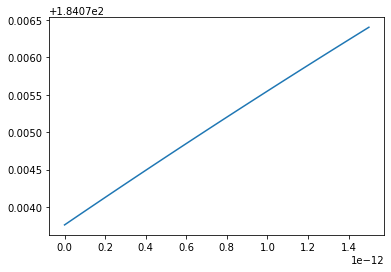

In [61]:
t = np.arange(0, 1.5*10**(-12), 1.5*10**(-14))
_mdot = np.zeros(len(t))

reactor = ct.IdealGasReactor(gas)  # Need to re-initialize reactor before running sim
sim = ct.ReactorNet([reactor])

for i in range(len(t)):
    sim.advance((i)*1e-7)
    _mdot[i] = nozzle_nasa_mdot(t[i])
    print(gas.T)
    
    
# print(t.shape) 
# print(_mdot.shape)
plt.plot(t, _mdot)  # For debugging

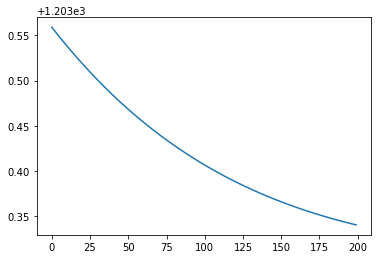

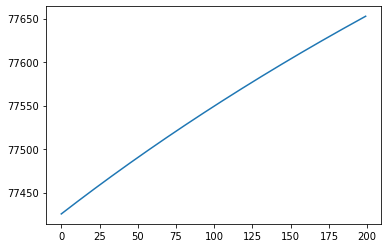

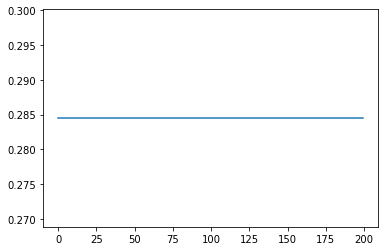

In [40]:
plt.plot(Tt)
plt.figure()
plt.plot(Pt)
plt.figure()
plt.plot(Rhot)
####